In [1]:
import pandas as pd
import numpy as np

In [2]:
import generatorinator as gen

In [3]:
Soil_Material = gen.Material("Soil", 1, {
                                        8016: -0.4133,
                                        14000: -0.3092,
                                        6000: -0.2700,
                                        1001: -0.0075,
                                            })
Ba_Sheilding_Material = gen.Material("Ba_Sheilding", 2, {
                                                        1001: -0.048535,
                                                        5010: -0.034981,
                                                        5011: -0.139923,
                                                        8016: -0.776561,
                                                        })
Pb_Sheilding_Material = gen.Material("Pb_Sheilding", 3, {
                                                        82000: 1,
                                                        })
Fe_Sheilding_Material = gen.Material("Fe_Sheilding", 4, {
                                                        26000: 1,
                                                        })
Detector_Material = gen.Material("Detector", 5, {
                                                        11023: 0.5,
                                                        53127: 0.5,
                                                    })
Air_Material = gen.Material("Air", 6, {
                                                        8016: -0.23,
                                                        7014: -0.77,
                                                    })
Tire_Material = gen.Material("Tire", 7, {
                                                        1001: -0.118371,
                                                        6000: -0.881629,
                                                    })

static_materials = [Soil_Material, Ba_Sheilding_Material, Pb_Sheilding_Material, Fe_Sheilding_Material, Detector_Material, Air_Material, Tire_Material]

In [4]:
def place_shield(shield_ids, x, y, z):
    
    Front_Pb_shield_surface = gen.box(shield_ids[0], [x+37.5, y+0, z+5], 5, 60.1, 20)
    Front_Fe_shield_1_surface = gen.box(shield_ids[1], [x+32.5, y+0, z+5], 5, 55, 20)
    Front_Ba_shield_surface = gen.box(shield_ids[2], [x+25, y+0, z+5], 10, 55, 20)
    Front_Fe_shield_2_surface = gen.box(shield_ids[3], [x+17.5, y+0, z+5], 5, 55, 20)
    Right_Fe_shield_surface = gen.box(shield_ids[4], [x-8, y+16.25, z+5], 46, 2.5, 20)
    Right_Ba_shield_surface = gen.box(shield_ids[5], [x-8, y+22.5, z+5], 46, 10, 20)
    Left_Fe_shield_surface = gen.box(shield_ids[6], [x-8, y-16.25, z+5], 46, 2.5, 20)
    Left_Ba_shield_surface = gen.box(shield_ids[7], [x-8, y-22.5, z+5], 46, 10, 20)

    return [Front_Pb_shield_surface, Front_Fe_shield_1_surface, Front_Ba_shield_surface, Front_Fe_shield_2_surface, Right_Fe_shield_surface, Right_Ba_shield_surface, Left_Fe_shield_surface, Left_Ba_shield_surface]


In [5]:
def place_wheel(wheel_ids, x=0, y=0, z=0, dir=(0, 1, 0)):
    wheel_radius = 15.24
    tire_radius = 29
    tire_width = 25
    tread_thickness = 1.3
    tire_surface = gen.cylinder(wheel_ids[0], pos = (x, y, z), r = tire_radius, height = tire_width, dir=dir)
    wheel_surface = gen.cylinder(wheel_ids[1], pos=(x, y, z), r = wheel_radius, height=tire_width, dir=dir)
    
    normal_dir = gen.normalize(dir)
    inside_tire_fix = [tread_thickness*d for d in normal_dir]
    inside_tire_xyz = [inside_tire_fix[i]*[x,y,z][i] for i in range(3)]
    inside_tire_surface = gen.cylinder(wheel_ids[2], pos = inside_tire_xyz, r = tire_radius-tread_thickness, height = tire_width-tread_thickness*2, dir=dir)
    
    return [tire_surface, wheel_surface, inside_tire_surface]


In [6]:
def place_detector(detector_ids, x, y, z):
    detector_1_surface = gen.box(detector_ids[0], pos=(x, y+14.7, z), l=12.7, w=12.7, h=15.24)
    detector_2_surface = gen.box(detector_ids[1], pos=(x, y, z), l=12.7, w=12.7, h=15.24)
    detector_3_surface = gen.box(detector_ids[2], pos=(x, y-14.7, z), l=12.7, w=12.7, h=15.24)
    return [detector_1_surface, detector_2_surface, detector_3_surface]


In [7]:
Outer_Bound = gen.sphere(100, [0, 0, 0], 800)
Shield_Surfaces = place_shield([i for i in range(5, 13)], 0, 0, 0)
static_surfaces = [Outer_Bound] + Shield_Surfaces

In [8]:

outside_world = gen.cell(101, 'outside_world', 0, None, '100', importance='imp:n,p,e 0')
air_cell = gen.cell(0, 'air', 6, -0.00129, '-100 1 2 3 4 5 6 7 8 9 10 11 12 #(-13 14 15) #(-16 17 18)', importance='imp:n,p,e 1')
soil_cell = gen.cell(1, 'soil', 1, -1.05, '-1', importance='imp:n,p,e 1')
detector_1_cell = gen.cell(2, 'detector_1', 5, -3.67, '-2', importance='imp:n,p,e 1')
detector_2_cell = gen.cell(3, 'detector_2', 5, -3.67, '-3', importance='imp:n,p,e 1')
detector_3_cell = gen.cell(4, 'detector_3', 5, -3.67, '-4', importance='imp:n,p,e 1')
Front_Pb_shield_cell = gen.cell(5, 'Front_Pb_shield', 3, -11.35, '-5', importance='imp:n,p,e 1')
Front_Fe_shield_1_cell = gen.cell(6, 'Front_Fe_shield_1', 2, -7.86, '-6', importance='imp:n,p,e 1')
Front_Ba_shield_cell = gen.cell(7, 'Front_Ba_shield', 3, -1.5, '-7', importance='imp:n,p,e 1')
Front_Fe_shield_2_cell = gen.cell(8, 'Front_Fe_shield_2', 2, -7.86, '-8', importance='imp:n,p,e 1')
Right_Fe_shield_cell = gen.cell(9, 'Right_Fe_shield', 4, -7.86, '-9', importance='imp:n,p,e 1')
Right_Ba_shield_cell = gen.cell(10, 'Right_Ba_shield', 2, -1.5, '-10', importance='imp:n,p,e 1')
Left_Fe_shield_cell = gen.cell(11, 'Left_Fe_shield', 4, -7.86, '-11', importance='imp:n,p,e 1')
Left_Ba_shield_cell = gen.cell(12, 'Left_Ba_shield', 2, -1.5, '-12', importance='imp:n,p,e 1')
tire_1_cell = gen.cell(13, 'tire_1', 7, -0.92, '-13 14 15', importance='imp:n,p,e 1')
tire_2_cell = gen.cell(16, 'tire_2', 7, -0.92, '-16 17 18', importance='imp:n,p,e 1')

cells = [outside_world, air_cell, soil_cell, detector_1_cell, detector_2_cell, detector_3_cell, Front_Pb_shield_cell, Front_Fe_shield_1_cell, Front_Ba_shield_cell, Front_Fe_shield_2_cell, Right_Fe_shield_cell, Right_Ba_shield_cell, Left_Fe_shield_cell, Left_Ba_shield_cell, tire_1_cell, tire_2_cell]



In [9]:
source = gen.source(1, (0, 0, 0), 14)

In [10]:
gebs = [None, [-0.0073, 0.0078, 0]]
time_bins = ['50 1e5','0 150i 150']
tmcs = [None, [0,50]]

n_tallies = len(gebs) * len(time_bins) * len(tmcs)
tal_headers = [i for i in range(1, n_tallies+1)]
i=0
tallies = []
for geb in gebs:
    for time_bin in time_bins:
        for tmc in tmcs:
            i+=1
            tallies.append(
                gen.tally(
                    tally_id=(i*10)+6,
                    tally_type=6,
                    particle='e', 
                    cells='(1 2 3)',
                    ))
            tallies.append(
                gen.tally(
                    tally_id=(i*10)+8,
                    tally_type=8,
                    particle='p', 
                    cells='(1 2 3)',
                    energy_bins='0 1e-5 932i 8.4295',
                    time_bins=time_bin,
                    geb=geb,
                    tmc=tmc,
                    phl=(i*10)+6,
                    ))

In [11]:
x0 = np.array([])
z0 = np.array([])

distance_from_shielding = np.linspace(10, 40, 3)
height_from_ground = np.linspace(20, 50, 3)

x, z = np.meshgrid(distance_from_shielding, height_from_ground)

x0 = np.append(x0, x.flatten())
z0 = np.append(z0, z.flatten())

distance_from_shielding = np.linspace(20, 30, 3)
height_from_ground = np.linspace(30, 40, 4)

x, z = np.meshgrid(distance_from_shielding, height_from_ground)

x0 = np.append(x0, x.flatten())
z0 = np.append(z0, z.flatten())

distance_from_shielding = np.linspace(10, 25, 7)
height_from_ground = np.linspace(30, 40, 4)

x, z = np.meshgrid(distance_from_shielding, height_from_ground)

x0 = np.append(x0, x.flatten())
z0 = np.append(z0, z.flatten())

x0, z0 = np.unique(np.array([x0, z0]).T, axis=0).T
x0 = x0.tolist()
z0 = z0.tolist()

distance_from_shielding = np.linspace(10, 25, 7)
height_from_ground = np.linspace(30, 40, 7)

x, z = np.meshgrid(distance_from_shielding, height_from_ground)

x0 = np.append(x0, x.flatten())
z0 = np.append(z0, z.flatten())

x0, z0 = np.unique(np.array([x0, z0]).T, axis=0).T
x0 = x0.tolist()
z0 = z0.tolist()

distance_from_shielding = np.linspace(0, 10, 5)
height_from_ground = np.linspace(30, 50, 7)

x, z = np.meshgrid(distance_from_shielding, height_from_ground)

x0 = np.append(x0, x.flatten())
z0 = np.append(z0, z.flatten())

x0, z0 = np.unique(np.array([x0, z0]).T, axis=0).T
x0 = x0.tolist()
z0 = z0.tolist()

/home/jac2462@uta.edu/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


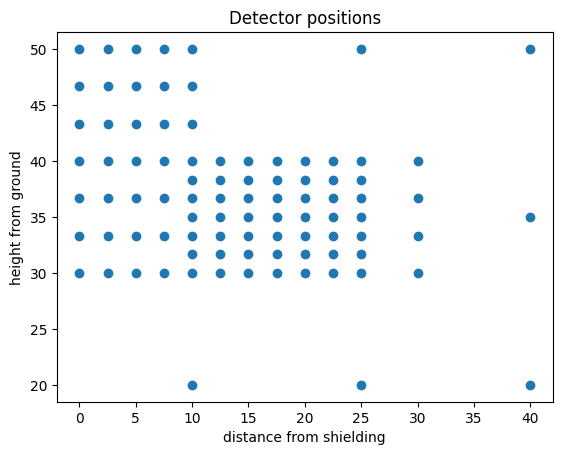

In [12]:
# graph x and z positions
import matplotlib.pyplot as plt
plt.scatter(x0, z0)
plt.xlabel("distance from shielding")
plt.ylabel("height from ground")
plt.title("Detector positions")
plt.show()

In [13]:
names = []
distance_from_shieldings = []
distances_from_ground = []
surfaces = []
for x, z in zip(x0, z0):
    
    surfaces = static_surfaces.copy()
    materials = static_materials
    cells = cells

    title = f"detector_dfs_{int(x)}_dfg_{int(z)}"
    filename = title+'.inp'

    detectors_surface = place_detector([2, 3, 4], x+40, 0, 3)
    soil_surface = gen.box(1, [0, 0, -z], 800, 800, 3)
    tire_1_surface = place_wheel([13, 14, 15], 68, -75.7, 29-z, (0, 1, 0))
    tire_2_surface = place_wheel([16, 17, 18], 68, 75.7, 29-z, (0, -1, 0))
    surfaces += detectors_surface + [soil_surface] + tire_1_surface + tire_2_surface
    
    
    mcnp = gen.sim(
        title, 
        nps=1e6,
        prdmp=[-60, -60, -1],
        source=source,
        tallies=tallies,
        surfaces=surfaces,
        materials=materials,
        cells=cells,
        )
    with open('../'+filename, 'w') as f:
        f.write(str(mcnp))
        f.close()

    # print(len(surfaces))
    surface_dicts = [surface.to_dict() for surface in surfaces]
    gen.dict_to_json(surface_dicts, 'world/surfaces/'+title+'surface.json')

    names.append(title)
    distance_from_shieldings.append(x)
    distances_from_ground.append(z)

df = pd.DataFrame({'name': names, 'distance_from_shielding': distance_from_shieldings, 'distance_from_ground': distances_from_ground})
df.to_csv('filenames.csv', index=False)  
df    

,name,distance_from_shielding,distance_from_ground
0,detector_dfs_0_dfg_30,0.0,30.000000
1,detector_dfs_0_dfg_33,0.0,33.333333
2,detector_dfs_0_dfg_36,0.0,36.666667
3,detector_dfs_0_dfg_40,0.0,40.000000
4,detector_dfs_0_dfg_43,0.0,43.333333
...,...,...,...
85,detector_dfs_30_dfg_36,30.0,36.666667
86,detector_dfs_30_dfg_40,30.0,40.000000
87,detector_dfs_40_dfg_20,40.0,20.000000
88,detector_dfs_40_dfg_35,40.0,35.000000
